In [2]:
import torch
import torch.nn as nn
import random
import gym
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros import SuperMarioBrosEnv
from tqdm import tqdm
import pickle 
import gym
import numpy as np
import collections 
import cv2
import matplotlib.pyplot as plt
import time
import datetime
import json
from toolkit.gym_env import *
from toolkit.action_utils import *
from toolkit.train_marlios_lstm import *
from toolkit.marlios_lstm import *
from toolkit.constants import *
from toolkit.train_test_samples import *
import warnings
import wandb 
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [ ]:
train(
    name='RNN first Attempt (working)',
    training_mode=True, 
    pretrained=False, # use the pretrained model
    ep_per_stat=100, 
    gamma=0.9,
    num_episodes=1000,
    run_id=None,
    lr=0.000005, 
    lr_decay= 0.99,
    exploration_min=0.05,
    exploration_max = 1, # setting this to the min for the rerun model
    exploration_decay=0.99, 
    action_space=TRAIN_SET,
    n_actions=32,
    debug=True,
    device='cpu',
    max_time_per_ep=50, # limit runs to a fewer seconds,
    log = False,
    hidden_shape=32
    )

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# only need to run if you cut the above off early, even then you don't 'have' to but it will do it automatically for you, it's just not as nice to have the output above as well
wandb.finish()

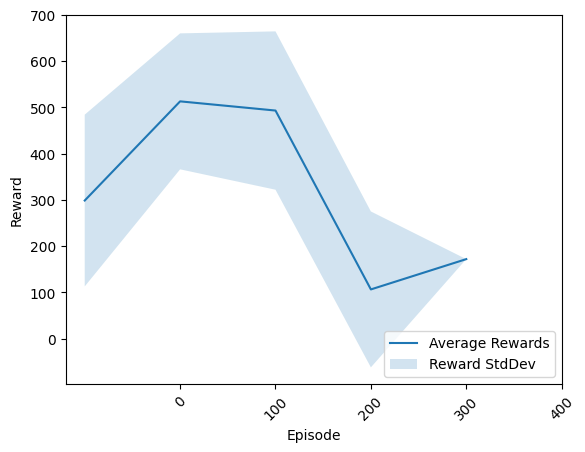

In [3]:
# cp ModelCheckpoints/*1682283822* . resetting this run here
run_id = '1682924922'
total_rewards = load_item('total_rewards-{}.pkl'.format(run_id))
plot_rewards(ep_per_stat=100, total_rewards=total_rewards)